# Plot ice

# First, load libraries

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import netcdf_tools
import numpy as np
import pandas as pd

plt.close("all")

# Select year

In [2]:
ndays=365

In [3]:
first_year=np.arange(0,365)

# Observations

## Observations: ice concentration

Break-up was on 18 July 2016 (Oziel et al., 2019).

In [4]:
obsice=np.empty(365)
obsice[:]=np.NaN
obsice[0:199]=1
obsice[199]=0

Day of $in\ situ$ sea ice break-up:

In [5]:
iT15_start_obs=next(i for i,v in enumerate(obsice) if v < 0.15)

## Observations: snow and ice thickness

The file Ice thickness from https://www.seanoe.org/data/00487/59892/ contains $in\ situ$ snow and ice thickness at the Green Edge sea ice camps 2015 and 2016 ($67.48^\circ N$, $-63.79^\circ E$). Variable 'sample_thickness_cm_average' is the snow or ice thickness ($cm$).

### Observations: snow and ice thickness: load dataset

In [6]:
def load_thickness():
    fname='../../../obs/66407.csv'
    df = (
        pd.read_csv(
            fname,
            dtype={
                'mission': 'string',
                'date': str,
                'date_time': str,
                'latitude': np.float32,
                'longitude': np.float32,
                'sample_type': 'category',
                'sample_thickness_cm_average': np.float32,
                'sample_thickness_cm_sd': np.float32,
                'pi': 'category'
            },
            parse_dates=['date','date_time']
        )
    )
    df['doy']=df['date'].apply(lambda x:x.timetuple().tm_yday)
    df['sample_thickness_m_average']=df['sample_thickness_cm_average'] \
    .apply(lambda x:x/100)
    return df

In [7]:
thickness_df=load_thickness()

### Observations: snow and ice thickness: select

We select the observations of snow thickness at the ice camp 2016.

In [8]:
snow_thickness_df=thickness_df[(thickness_df.mission=='ice_camp_2016') \
                               & (thickness_df.sample_type=='snow')]

We select the observations of ice thickness at the ice camp 2016.

In [9]:
ice_thickness_df=thickness_df[(thickness_df.mission=='ice_camp_2016') \
                              & (thickness_df.sample_type=='ice')]

# Model NEMO-LIM3

## Ice concentration

### Ice concentration: from 2013 to 2017

Variable 'ice concentration' is the sea ice concentration ($unitless$, between 0 and 1).
It is at indices (1,1) meaning centre of grid point was used.
File 'Ice_d.nc' is the output of NEMO3.6+LIM3.6 configured by Gaetan Olivier (UBO) for the Green Edge ice camp 2016 ($67.48^\circ N$, $-63.79^\circ E$).

In [10]:
ice_file='Ice_d.nc'
array1d_iT_ice_concentrationfull= \
netcdf_tools.read_netcdf(ice_file,'ice concentration')
array1d_iT_ice_concentrationfull=array1d_iT_ice_concentrationfull[:,1,1]

### Ice concentration: from 2016

In [11]:
array1d_iT_ice_concentration=array1d_iT_ice_concentrationfull[ndays*3:ndays*4]

# Snow volume

Snow volume is the weighted average of snow thickness averaged by the sea ice concentration. For example, if there is $50\%$ of sea ice concentration and $2\ m$ of snow on the sea ice-covered part of the pixel, snow volume will be $1\ m$. The expression 'snow thickness' in the labels of the plots corresponds to the variable 'snow volume' in NEMO-LIM3 and the NetCDF file Ice_d.nc.

Variable 'snow volume' is the snow volume ($m$).
It is at indices (1,1) meaning centre of grid point was used.
File 'Ice_d.nc' is the output of NEMO3.6+LIM3.6 configured by Gaetan Olivier (UBO) for the Green Edge ice camp 2016 ($67.48^\circ N$, $-63.79^\circ E$).

## Snow volume: from 2013 to 2017

In [12]:
array1d_iT_snow_volumefull=\
netcdf_tools.read_netcdf(ice_file,'snow volume')
array1d_iT_snow_volumefull=array1d_iT_snow_volumefull[:,1,1]

## Snow volume: from 2016

In [13]:
array1d_iT_snow_volume=array1d_iT_snow_volumefull[ndays*3:ndays*4]

# Ice volume

Ice volume is the weighted average of ice thickness averaged by the sea ice concentration. For example, if there is $50\%$ of sea ice concentration and $2\ m$ of ice on the sea ice-covered part of the pixel, ice volume will be $1\ m$. The expression 'ice thickness' in the labels of the plots corresponds to the variable 'ice volume' in NEMO-LIM3 and the NetCDF file Ice_d.nc.

Variable 'ice volume' is the ice volume ($m$).
It is at indices (1,1) meaning centre of grid point was used.
File 'Ice_d.nc' is the output of NEMO3.6+LIM3.6 configured by Gaetan Olivier (UBO) for the Green Edge ice camp 2016 ($67.48^\circ N$, $-63.79^\circ E$).

## Ice volume: from 2013 to 2017

In [14]:
array1d_iT_ice_volumefull=\
netcdf_tools.read_netcdf(ice_file,'ice volume')
array1d_iT_ice_volumefull=array1d_iT_ice_volumefull[:,1,1]

## Ice volume: from 2016

In [15]:
array1d_iT_ice_volume=array1d_iT_ice_volumefull[ndays*3:ndays*4]

# Plot

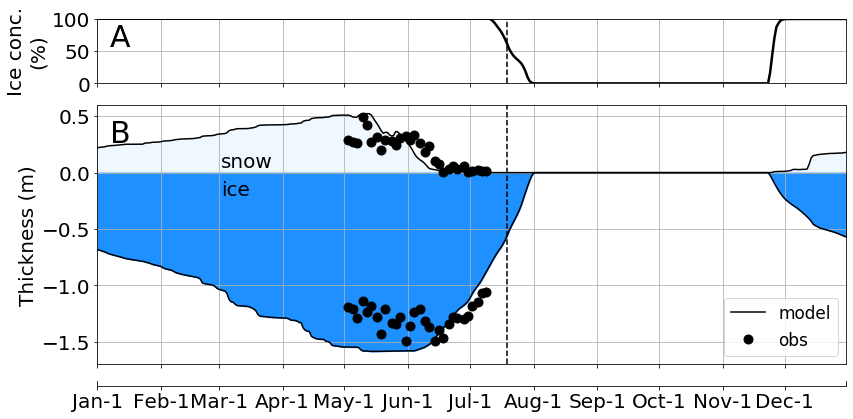

In [19]:
with plt.style.context('validation.mplstyle'):
    locs=np.array([0, 31, 59, 90, 120, 151,
                   181, 212, 243, 273, 304, 334])
    labels=('Jan-1','Feb-1','Mar-1','Apr-1','May-1','Jun-1',
            'Jul-1','Aug-1','Sep-1','Oct-1','Nov-1','Dec-1')
    fig,axs=plt.subplots(3,1,sharex=False,figsize=(16, 6))

    # --- ICE CONCENTRATIONS
    ax=axs[0]
    ax.plot(first_year,array1d_iT_ice_concentration*100,
           '-',color='black',lw=2.5)
    ax.set_xlim(first_year[0],first_year[-1])
    xlims=ax.get_xlim()
    ax.set_xticks(locs)
    ax.set_xticklabels([])
    ax.set_yticks([0,50,100])
    ax.set_ylabel('Ice conc.\n(%)')
    ax.set_ylim(0,100)
    ax.grid()
    plt.text(0.03,0.7,'A',
             horizontalalignment = 'center',verticalalignment='center',
             transform=ax.transAxes, fontsize=30)
    # adding the vertical line at 15% of observed ice
    ax.axvline(iT15_start_obs,linestyle='--',color='black')

    # --- SNOW AND ICE THICKNESS
    ax=axs[1]
    h1=ax.fill_between(first_year,array1d_iT_snow_volume,
                       linestyle='-',color='aliceblue',linewidth=1)
    h2=ax.plot(first_year,array1d_iT_snow_volume,
               linestyle='-',color='black')
    h3=ax.plot((snow_thickness_df['doy']-1).to_numpy(),
              snow_thickness_df['sample_thickness_m_average'].to_numpy(),
              'o',color='black')
    ax.set_xlim(xlims)
    ax.set_xticks(locs)
    ax.set_xticklabels([])
    ax.set_ylabel('Thickness (m)')
    ax.set_ylim(-1.7,0.6)
    ax.grid()
    ax.text(60,0.1,'snow',
            horizontalalignment = 'left',verticalalignment = 'center',
            fontsize=20)
    h4=ax.fill_between(first_year,-array1d_iT_ice_volume,
                       linestyle='-',color='dodgerblue',linewidth=1)
    h5=ax.plot(first_year,-array1d_iT_ice_volume,
               linestyle='-',color='black')
    h6=ax.plot((ice_thickness_df['doy']-1).to_numpy(),
              -ice_thickness_df['sample_thickness_m_average'].to_numpy(),
              'o',color='black')
    ax.text(60,-0.15,'ice',
            horizontalalignment = 'left',verticalalignment = 'center',
            fontsize=20)
    ax.legend([h2[0],h3[0]],['model','obs'],loc=4)
    plt.text(0.03,0.89,'B',
             horizontalalignment = 'center',verticalalignment='center',
             transform=ax.transAxes, fontsize=30)
    # adding the vertical line at 15% of observed ice
    ax.axvline(iT15_start_obs,linestyle='--',color='black')

    # --- ADDITIONAL X-AXIS
    ax=axs[2]
    ax.set_xlim(xlims)
    ax.set_xticks(locs)
    ax.set_xticklabels(labels)
    ax.axes.get_yaxis().set_visible(False)
    ax.spines['top'].set_visible(False)

    # --- POSITION
    axs[0].set_position( [0.12,0.80  ,0.65,.15])
    axs[1].set_position( [0.12,0.15  ,0.65,.60])
    axs[2].set_position( [0.12,0.10  ,0.65,.01])

    # --- SAVE
    plt.savefig('Ice_d.png')